# Proyek Sistem Rekomendasi
- Nama: Leonard Bodhi Kumaro
- Email: bkleonard174@gmail.com
- ID: leonardkumaro

***Perancangan Sistem Pendukung Keputusan Rekomendasi Menu Makanan Pada Penderita Diabetes Mellitus Menggunakan Metode Content-Based Filtering Dan Collaborative Filtering***

## Deskripsi Proyek

Penderita Diabetes Mellitus memerlukan pengaturan pola makan yang ketat guna menjaga kadar gula darah dalam batas normal. Pemilihan menu makanan yang sesuai dengan kebutuhan gizi dan kondisi kesehatan penderita menjadi aspek penting dalam manajemen penyakit ini. Namun, banyak penderita yang mengalami kesulitan dalam menentukan menu makanan yang aman dan sesuai preferensi pribadi. Oleh karena itu, dibutuhkan suatu sistem yang dapat memberikan rekomendasi menu makanan secara cerdas dan adaptif.

Proyek ini bertujuan untuk merancang dan mengembangkan Sistem Pendukung Keputusan Rekomendasi Menu Makanan bagi penderita Diabetes Mellitus dengan memanfaatkan teknik Content-Based Filtering dan Collaborative Filtering. Metode Content-Based Filtering digunakan untuk merekomendasikan menu berdasarkan kandungan gizi makanan dan kebutuhan individu, sedangkan Collaborative Filtering digunakan untuk menyarankan menu berdasarkan preferensi pengguna lain dengan kondisi serupa.

Dataset yang digunakan dalam proyek ini mencakup informasi nutrisi berbagai jenis makanan, seperti kalori, kadar gula, karbohidrat, serat, lemak, kolesterol, protein, sodium, dan kalium, serta data preferensi pengguna terhadap makanan tertentu. Sistem akan membangun profil pengguna berdasarkan riwayat konsumsi dan preferensi makanan yang dianggap aman dan disukai. Dengan menggabungkan kedua pendekatan filtering, sistem diharapkan mampu menghasilkan rekomendasi yang lebih personal, relevan, dan bermanfaat dalam menunjang pengelolaan pola makan penderita diabetes.

Proyek ini diharapkan dapat memberikan kontribusi nyata dalam bidang teknologi kesehatan, khususnya dalam mendukung pengambilan keputusan berbasis data untuk meningkatkan kualitas hidup penderita Diabetes Mellitus melalui asupan makanan yang tepat.

## Business Understanding

Diabetes melitus, khususnya tipe 2, merupakan salah satu penyakit kronis yang paling banyak diderita di seluruh dunia dan menjadi penyebab utama berbagai komplikasi kesehatan seperti penyakit kardiovaskular, gagal ginjal, serta gangguan penglihatan. Salah satu aspek penting dalam pengelolaan diabetes adalah pengaturan pola makan, karena konsumsi makanan yang tidak sesuai dapat menyebabkan lonjakan kadar gula darah yang berbahaya. Oleh karena itu, penentuan asupan makanan yang tepat dan individualistik menjadi kebutuhan mendesak dalam praktik klinis dan gaya hidup penderita diabetes.

## Import Semua Packages/Library yang Digunakan

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import os
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow import keras
from tensorflow.keras import layers
import itertools
import random
from multiprocessing import Pool

## Data Understanding

Tahapan Data Understanding merupakan langkah awal dalam proses pengembangan sistem rekomendasi yang bertujuan untuk memahami karakteristik, struktur, serta kualitas data yang akan digunakan. Dalam proyek ini, data yang digunakan mencakup dua komponen utama, yaitu data nutrisi makanan dan data preferensi pengguna.

### Data Loading

Tahapan Data Loading merupakan proses awal dalam siklus pemodelan data yang bertujuan untuk memuat dan mengintegrasikan data mentah ke dalam lingkungan kerja analitik, sehingga siap untuk dilakukan proses pembersihan, eksplorasi, dan pemodelan lebih lanjut. Dalam proyek ini, proses loading mencakup dua sumber data utama, yaitu data nutrisi makanan dan data preferensi pengguna.

| Jenis       | Keterangan                                                       |
|-------------|------------------------------------------------------------------|
| Title       | Rekomendasi Makanan Gizi Anak                                           |
| Source      | [Kaggle](https://www.kaggle.com/datasets/laurenvalentina/rekomendasi-makanan-gizi-anak)                                                           |
| Maintainer  | [Lauren Valentina](https://www.kaggle.com/laurenvalentina)              |
| Visibility  | Publik                                                           |
| Tags        | Gizi, Anak, Makanan, Nutrisi, Rekomendasi                 |

In [40]:
# load the data
foods_df = pd.read_csv('content/preprocessed_dataset.csv')
foods_df.head()

,Id,Nama,Kategori,Jumlah Porsi,Takaran Porsi,Kalori (kal),Lemak (g),Lemak Jenuh (g),Lemak Tak Jenuh Ganda (g),Lemak Tak Jenuh Tunggal (g),Kolestrol (g),Protein (g),Karbohidrat (g),Serat (g),Gula (g),Sodium (g),Kalium (g)
0,0,Alpukat,Buah Buahan,100,gram (g),160.0,14.66,2.126,1.816,9.799,0.0,2.00,8.53,6.7,0.66,7.0,485.0
1,1,Guacamole,Buah Buahan,1,sdm,23.0,2.08,0.302,0.258,1.393,0.0,0.29,1.24,1.0,0.10,22.0,69.0
2,2,Guacamole dengan Tomat,Buah Buahan,100,gram (g),116.0,9.94,1.446,1.258,6.625,0.0,1.62,7.64,4.9,1.37,201.0,393.0
3,3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,1,mangkok,266.0,22.72,3.304,2.882,15.129,0.0,3.77,17.75,11.4,3.31,459.0,913.0
4,4,Buah Anggur,Buah Buahan,1,tanpa biji,3.0,0.01,0.003,0.002,0.000,0.0,0.04,0.90,0.0,0.77,0.0,10.0


Adapun penjelasan dari dataset ini :

File preprocessed_dataset.csv merupakan hasil ekstraksi, pembersihan, dan transformasi data dari dataset asli Rekomendasi Makanan Gizi Anak yang tersedia di platform Kaggle. Meskipun ditujukan untuk kebutuhan gizi anak, dataset ini telah disesuaikan untuk konteks rekomendasi makanan bagi penderita Diabetes Mellitus, dengan mempertimbangkan parameter nutrisi yang relevan seperti kadar gula, karbohidrat, serat, lemak, dan kalori.

| **Nama Kolom**                | **Tipe Data** | **Deskripsi**                                                                                          |
| ----------------------------- | ------------- | ------------------------------------------------------------------------------------------------------ |
| `Id`                          | Numerik       | Nomor identifikasi unik untuk setiap makanan. Digunakan sebagai kunci utama (primary key).             |
| `Nama`                        | Kategorikal   | Nama atau deskripsi dari item makanan. Digunakan sebagai identitas utama dalam sistem rekomendasi.     |
| `Kategori`                    | Kategorikal   | Jenis makanan, misalnya sayur, buah, lauk-pauk, minuman, dll. Digunakan untuk segmentasi.              |
| `Jumlah Porsi`                | Numerik       | Jumlah total porsi yang tersedia atau disarankan untuk konsumsi.                                       |
| `Takaran Porsi`               | Kategorikal   | Ukuran satu porsi (misalnya: 100g, 1 gelas, 1 potong).                                                 |
| `Kalori (kal)`                | Numerik       | Energi total dalam satu porsi makanan, dinyatakan dalam kilokalori (kkal).                             |
| `Lemak (g)`                   | Numerik       | Kandungan total lemak dalam makanan (dalam gram).                                                      |
| `Lemak Jenuh (g)`             | Numerik       | Jumlah lemak jenuh (saturated fat), yang perlu dibatasi karena berpengaruh terhadap kesehatan jantung. |
| `Lemak Tak Jenuh Ganda (g)`   | Numerik       | Lemak sehat yang dapat membantu menurunkan kadar kolesterol LDL (lemak jahat).                         |
| `Lemak Tak Jenuh Tunggal (g)` | Numerik       | Jenis lemak sehat yang mendukung fungsi jantung dan metabolisme.                                       |
| `Kolestrol (g)`               | Numerik       | Kandungan kolesterol dalam makanan (dalam gram). Perlu diperhatikan pada penderita diabetes.           |
| `Protein (g)`                 | Numerik       | Kandungan protein yang berfungsi untuk pemeliharaan dan regenerasi sel tubuh.                          |
| `Karbohidrat (g)`             | Numerik       | Total karbohidrat, termasuk pati, gula, dan serat (dalam gram). Penting untuk pengelolaan glukosa.     |
| `Serat (g)`                   | Numerik       | Kandungan serat pangan, yang membantu memperlambat penyerapan glukosa dan mengontrol gula darah.       |
| `Gula (g)`                    | Numerik       | Kandungan gula sederhana. Harus dibatasi oleh penderita Diabetes Mellitus.                             |
| `Sodium (g)`                  | Numerik       | Kandungan natrium atau garam dalam makanan. Berpengaruh terhadap tekanan darah.                        |
| `Kalium (g)`                  | Numerik       | Kandungan kalium, berperan penting dalam fungsi otot dan jantung.                                      |


#### Univariate Exploratory Data Analysis

Univariate EDA bertujuan untuk memahami karakteristik distribusi masing-masing variabel secara individu, baik numerik maupun kategorikal. Tahapan ini penting untuk mengenali penyebaran data, potensi ketidakseimbangan (skewness), dan outlier dalam fitur nutrisi makanan yang digunakan dalam sistem rekomendasi.

C:\Users\Pongo\AppData\Local\Temp\ipykernel_26992\3606314532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=foods_df, y='Kategori', order=foods_df['Kategori'].value_counts().index, palette='Set2')


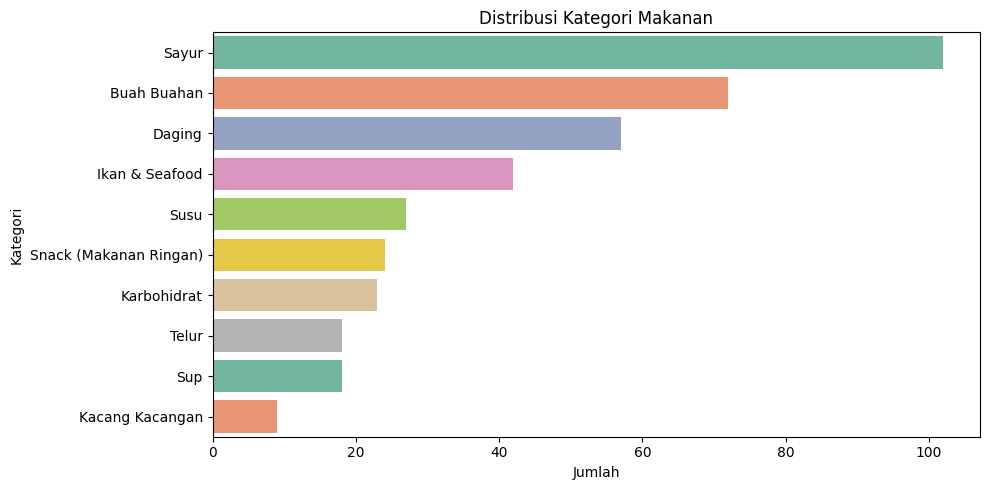

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(data=foods_df, y='Kategori', order=foods_df['Kategori'].value_counts().index, palette='Set2')
plt.title('Distribusi Kategori Makanan')
plt.xlabel('Jumlah')
plt.ylabel('Kategori')
plt.tight_layout()
plt.show()


Kategori Dominan:

Sayur merupakan kategori dengan jumlah makanan terbanyak, yakni lebih dari 100 item. Ini menunjukkan bahwa sayuran sangat beragam dalam dataset dan menjadi komponen penting untuk sistem rekomendasi, terutama karena sayuran cenderung rendah kalori dan kaya serat—sangat baik untuk penderita Diabetes Mellitus.

Buah-buahan menempati posisi kedua, menunjukkan bahwa dataset juga kaya akan makanan yang mengandung vitamin, serat, dan gula alami. Namun, perlu dicermati kandungan fruktosa dalam beberapa buah.

Daging dan Ikan & Seafood juga cukup dominan, mencerminkan sumber protein hewani yang beragam dalam dataset.

Kategori dengan Jumlah Rendah:

Kacang-Kacangan, Sup, dan Telur muncul dalam jumlah terbatas. Ini bisa menjadi indikasi bahwa representasi makanan dari kategori ini perlu ditambahkan untuk memperkaya sistem rekomendasi dan meningkatkan variasi.

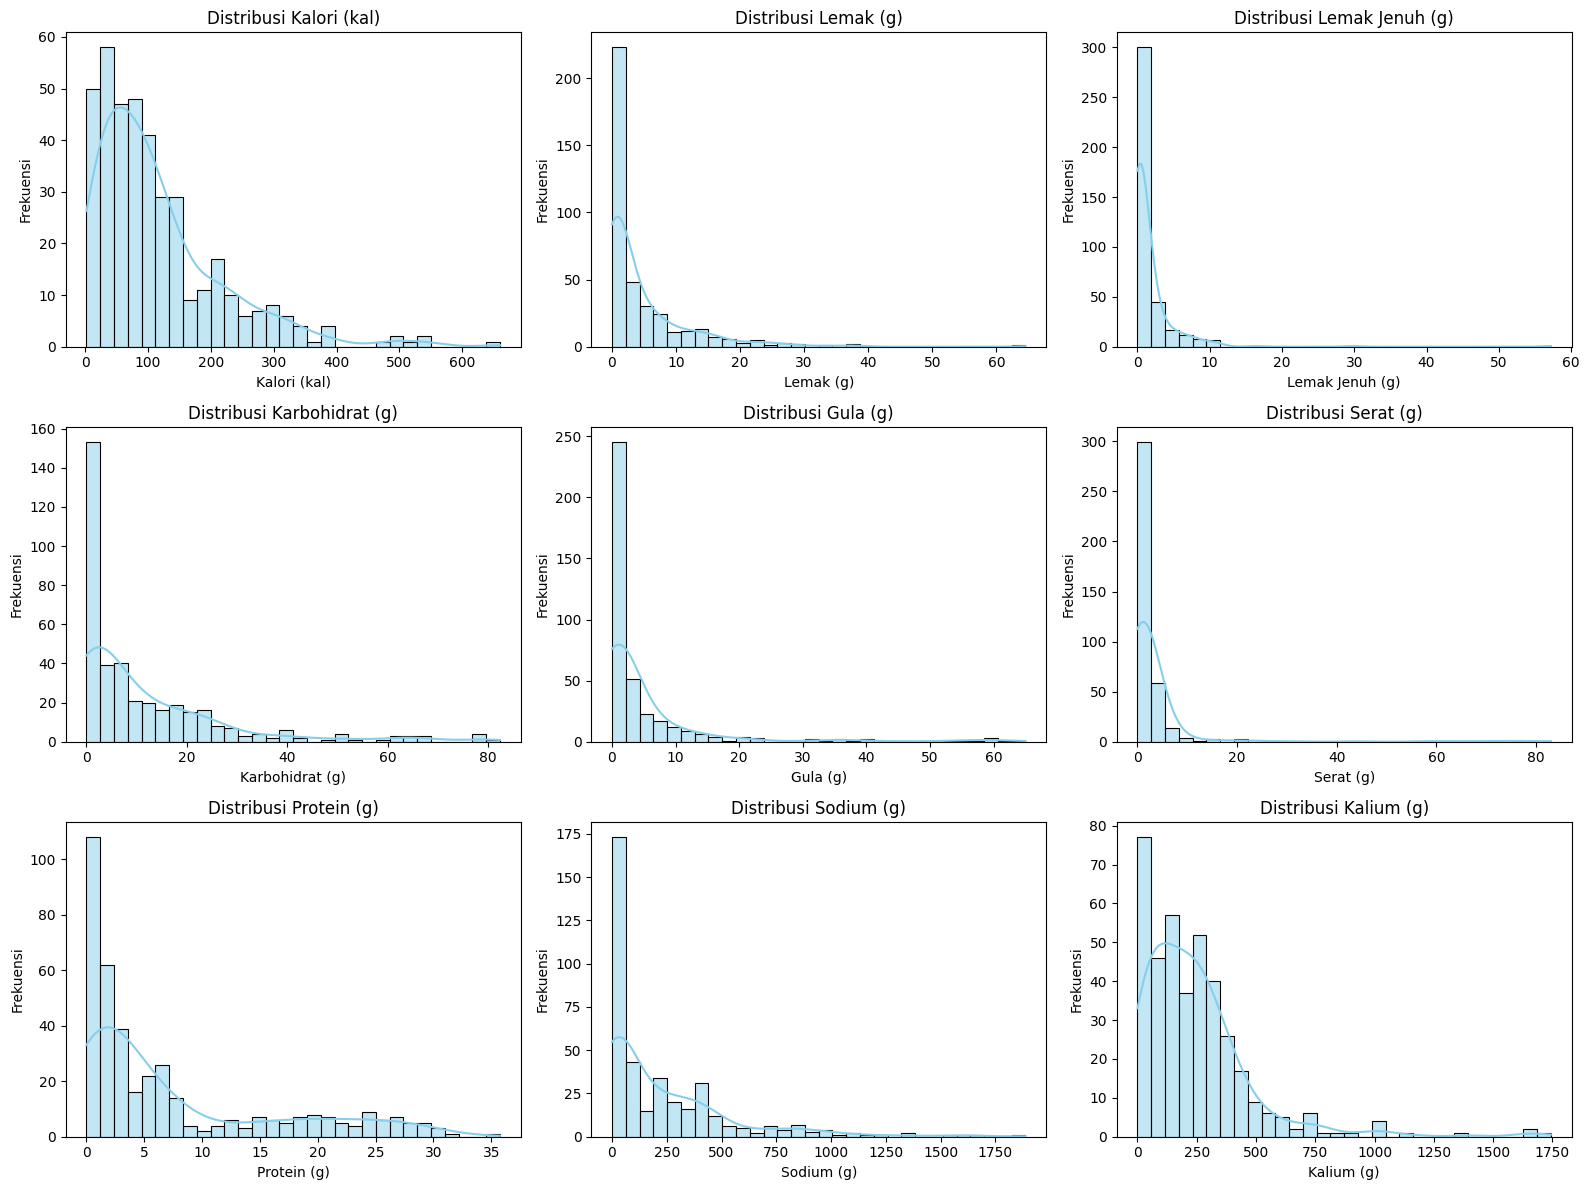

In [42]:
nutrients = ['Kalori (kal)','Lemak (g)', 'Lemak Jenuh (g)', 'Karbohidrat (g)', 'Gula (g)', 'Serat (g)', 'Protein (g)', 'Sodium (g)', 'Kalium (g)']
plt.figure(figsize=(16, 12))

for i, col in enumerate(nutrients, 1):
    plt.subplot(3, 3, i)
    sns.histplot(foods_df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


 Interpretasi Univariate EDA: Fitur Nutrisi

Visualisasi distribusi berikut menggambarkan pola persebaran setiap atribut numerik dalam dataset rekomendasi makanan untuk penderita Diabetes Mellitus.

 1. Kalori (kal)
- Distribusi: Right-skewed (positif skew).
- Mayoritas makanan memiliki kalori antara **50–150 kalori**.
- Outlier: Makanan dengan kalori >400 kalori.
- **Implikasi**: Kalori tinggi perlu dibatasi untuk menjaga berat badan dan kestabilan gula darah.

 2. Lemak (g)
- Distribusi: Sangat skewed ke kanan.
- Mayoritas makanan <10 g lemak.
- Outlier: Lemak >50 g.
- **Implikasi**: Lemak tinggi, terutama lemak jenuh, berisiko meningkatkan resistensi insulin.

 3. Lemak Jenuh (g)
- Distribusi: Mirip dengan lemak total, sangat skewed.
- Sebagian besar makanan mengandung <5 g.
- **Implikasi**: Lemak jenuh perlu dikendalikan karena berhubungan dengan risiko kardiovaskular.

 4. Karbohidrat (g)
- Distribusi: Right-skewed.
- Konsentrasi pada <20 g.
- Outlier: >80 g karbohidrat.
- **Implikasi**: Harus dianalisis lebih lanjut dengan indeks glikemik untuk rekomendasi lebih akurat.

 5. Gula (g)
- Distribusi: Skewed, mayoritas <5 g.
- Outlier: Hingga >60 g.
- **Implikasi**: Gula merupakan parameter kritis yang harus dibatasi pada penderita diabetes.

 6. Serat (g)
- Distribusi: Skewed ke kanan.
- Mayoritas <5 g, outlier hingga >20 g.
- **Implikasi**: Serat tinggi sangat direkomendasikan karena membantu mengontrol glukosa darah.

 7. Protein (g)
- Distribusi: Lebar dan skewed.
- Rentang protein dari <5 g hingga >30 g.
- **Implikasi**: Protein tinggi baik sebagai alternatif sumber energi non-karbohidrat.

 8. Sodium (g)
- Distribusi: Skewed ekstrem ke kanan.
- Mayoritas <500 mg, outlier hingga >1000 mg.
- **Implikasi**: Perlu dikontrol khusus bagi penderita diabetes dengan hipertensi.

 9. Kalium (g)
- Distribusi: Lebih mendekati normal, namun tetap skewed.
- Rentang cukup luas, beberapa makanan mengandung >1000 mg.
- **Implikasi**: Kalium penting untuk menjaga fungsi otot dan tekanan darah.

In [43]:
# Struktur data
print("Jumlah baris dan kolom:", foods_df.shape)

Jumlah baris dan kolom: (392, 17)


In [44]:
# Nama kolom
print("Nama kolom:", foods_df.columns.tolist())

Nama kolom: ['Id', 'Nama', 'Kategori', 'Jumlah Porsi', 'Takaran Porsi', 'Kalori (kal)', 'Lemak (g)', 'Lemak Jenuh (g)', 'Lemak Tak Jenuh Ganda (g)', 'Lemak Tak Jenuh Tunggal (g)', 'Kolestrol (g)', 'Protein (g)', 'Karbohidrat (g)', 'Serat (g)', 'Gula (g)', 'Sodium (g)', 'Kalium (g)']


In [45]:
# Tipe data
print("Tipe data per kolom:\n", foods_df.dtypes)

Tipe data per kolom:
 Id                               int64
Nama                            object
Kategori                        object
Jumlah Porsi                     int64
Takaran Porsi                   object
Kalori (kal)                   float64
Lemak (g)                      float64
Lemak Jenuh (g)                float64
Lemak Tak Jenuh Ganda (g)      float64
Lemak Tak Jenuh Tunggal (g)    float64
Kolestrol (g)                  float64
Protein (g)                    float64
Karbohidrat (g)                float64
Serat (g)                      float64
Gula (g)                       float64
Sodium (g)                     float64
Kalium (g)                     float64
dtype: object


In [46]:
# Nilai hilang
print("Jumlah nilai hilang:\n", foods_df.isnull().sum())
print("\n")
# Nilai duplikat
print("Jumlah nilai duplikat:", foods_df.duplicated().sum())

Jumlah nilai hilang:
 Id                             0
Nama                           0
Kategori                       0
Jumlah Porsi                   0
Takaran Porsi                  0
Kalori (kal)                   0
Lemak (g)                      0
Lemak Jenuh (g)                0
Lemak Tak Jenuh Ganda (g)      0
Lemak Tak Jenuh Tunggal (g)    0
Kolestrol (g)                  0
Protein (g)                    0
Karbohidrat (g)                0
Serat (g)                      0
Gula (g)                       0
Sodium (g)                     0
Kalium (g)                     0
dtype: int64


Jumlah nilai duplikat: 0


### Multivariate Exploratory Data Analysis

Analisis eksplorasi multivariat dilakukan untuk memahami hubungan antar fitur numerik dalam dataset makanan berdasarkan nilai gizinya. Tujuan utamanya adalah:

- Mengetahui keterkaitan antar nutrisi.
- Mengidentifikasi fitur-fitur yang saling berkorelasi kuat.
- Menentukan apakah terdapat redundansi informasi atau pola distribusi menarik yang bisa digunakan dalam pemodelan rekomendasi.

Korelasi Antar Fitur Numerik

Korelasi dihitung menggunakan Pearson correlation coefficient dan divisualisasikan dalam bentuk **heatmap**.

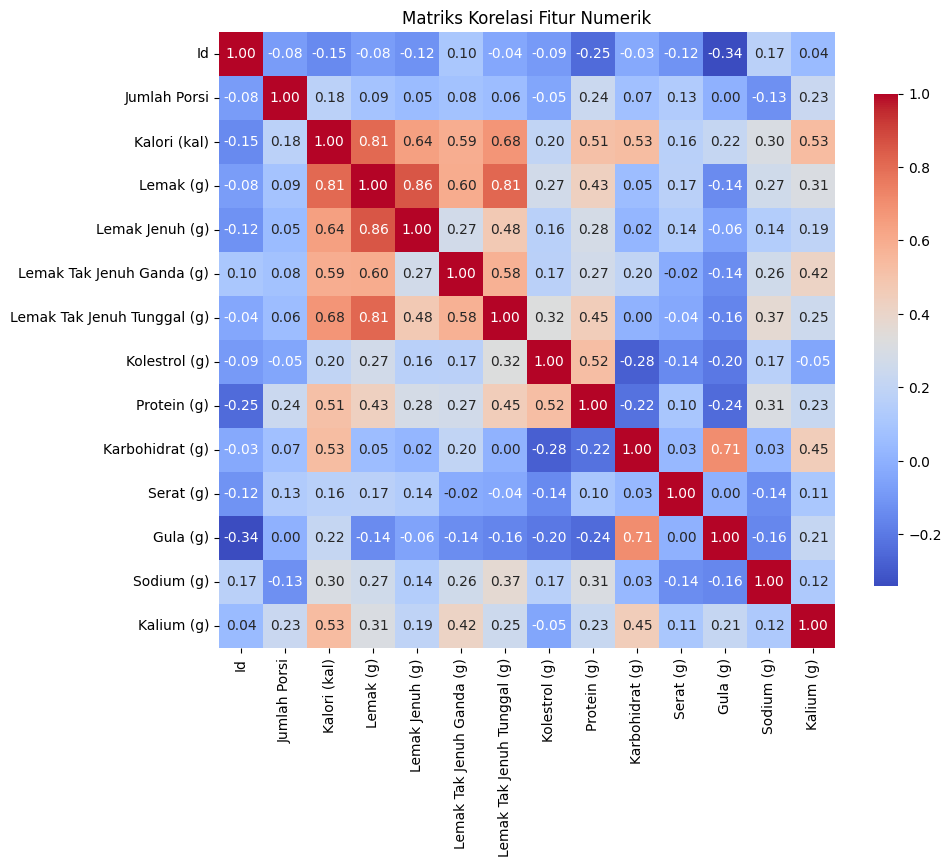

In [47]:
import seaborn as sns
# Matriks korelasi dari fitur numerik saja
nutrition = foods_df.select_dtypes(include=[np.number])
# Matriks korelasi
corr = nutrition.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

 1. Korelasi Tinggi (r > 0.70)

| Fitur 1               | Fitur 2                      | Nilai Korelasi | Keterangan                                                |
|-----------------------|------------------------------|----------------|------------------------------------------------------------|
| Lemak (g)             | Kalori (kal)                 | 0.81           | Lemak sangat berkontribusi terhadap total kalori.         |
| Lemak Jenuh (g)       | Lemak (g)                    | 0.86           | Lemak jenuh adalah bagian utama dari total lemak.         |
| Lemak Tak Jenuh Ganda | Kalori (kal)                 | 0.59           | Kontribusi terhadap kalori cukup tinggi.                  |
| Gula (g)              | Karbohidrat (g)              | 0.71           | Gula merupakan komponen dari karbohidrat.                 |
| Lemak Tak Jenuh Tunggal | Lemak (g)                  | 0.68           | Lemak tak jenuh tunggal berkontribusi signifikan.         |


 2. Korelasi Sedang (0.40 ≤ r ≤ 0.70)

| Fitur 1         | Fitur 2             | Nilai Korelasi | Keterangan                                               |
|-----------------|----------------------|----------------|-----------------------------------------------------------|
| Kalori (kal)    | Protein (g)          | 0.68           | Protein juga memberikan kontribusi terhadap kalori.       |
| Kolestrol (g)   | Protein (g)          | 0.52           | Makanan tinggi protein umumnya juga mengandung kolestrol. |
| Kalori (kal)    | Karbohidrat (g)      | 0.53           | Karbohidrat ikut menaikkan kalori.                        |
| Kalium (g)      | Kalori (kal)         | 0.53           | Indikasi bahwa makanan tinggi kalori cenderung kaya kalium.|

3. Korelasi Lemah dan Tidak Signifikan

- Fitur seperti **Sodium**, **Serat**, dan **Jumlah Porsi** menunjukkan korelasi rendah dengan hampir semua fitur lainnya.
- Ini mengindikasikan bahwa **Sodium dan Serat** memiliki karakteristik yang independen dan unik dalam komposisi makanan.

4. Korelasi Negatif

- Tidak ada korelasi negatif yang signifikan secara statistik.
- Beberapa fitur menunjukkan korelasi negatif lemah, namun nilainya di bawah ambang signifikansi (|r| < 0.3).


Korelasi ini dapat dimanfaatkan untuk:
- Seleksi fitur penting dalam pemodelan rekomendasi (content-based).
- Menyusun profil nutrisi yang lebih terarah dalam filtering makanan.

### Data Preprocessing

#### Menghapus Kolom yang Tidak Diperlukan

In [48]:
# Menghapus kolom yang tidak diperlukan
foods_df.drop(columns=['Jumlah Porsi', 'Takaran Porsi'], inplace=True)
# Cek kembali struktur data setelah penghapusan kolom
print("\nStruktur data setelah penghapusan kolom tidak diperlukan:\n", foods_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           392 non-null    int64  
 1   Nama                         392 non-null    object 
 2   Kategori                     392 non-null    object 
 3   Kalori (kal)                 392 non-null    float64
 4   Lemak (g)                    392 non-null    float64
 5   Lemak Jenuh (g)              392 non-null    float64
 6   Lemak Tak Jenuh Ganda (g)    392 non-null    float64
 7   Lemak Tak Jenuh Tunggal (g)  392 non-null    float64
 8   Kolestrol (g)                392 non-null    float64
 9   Protein (g)                  392 non-null    float64
 10  Karbohidrat (g)              392 non-null    float64
 11  Serat (g)                    392 non-null    float64
 12  Gula (g)                     392 non-null    float64
 13  Sodium (g)          

In [49]:
# Membuat variabel preparation yang berisi dataframe fix_resto kemudian mengurutkan berdasarkan placeID
preparation = foods_df
preparation.sort_values('Nama')

,Id,Nama,Kategori,Kalori (kal),Lemak (g),Lemak Jenuh (g),Lemak Tak Jenuh Ganda (g),Lemak Tak Jenuh Tunggal (g),Kolestrol (g),Protein (g),Karbohidrat (g),Serat (g),Gula (g),Sodium (g),Kalium (g)
197,202,1% Lemak Susu,Susu,102.0,2.37,1.545,0.085,0.676,12.0,8.22,12.18,0.0,12.69,107.0,366.0
198,203,2% Lemak Susu,Susu,50.0,1.97,1.257,0.073,0.560,8.0,3.30,4.68,0.0,5.06,41.0,150.0
266,275,Acar,Sayur,12.0,0.12,0.031,0.050,0.002,0.0,0.40,2.68,0.8,2.28,833.0,75.0
268,277,Acar Mentimun Asam,Sayur,11.0,0.20,0.052,0.082,0.003,0.0,0.33,2.26,1.2,1.06,1208.0,23.0
267,276,Acar Mentimun Manis,Sayur,117.0,0.26,0.066,0.106,0.004,0.0,0.37,31.81,1.1,14.63,939.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,372,Zaitun,Sayur,117.0,11.27,1.493,0.962,8.324,0.0,0.92,5.40,3.1,0.16,1083.0,18.0
365,374,Zaitun Hijau,Sayur,42.0,4.44,0.588,0.379,3.281,0.0,0.30,1.11,1.0,0.16,451.0,12.0
367,376,"Zaitun Hijau (Acar, Kaleng atau Botol)",Sayur,145.0,15.32,2.029,1.307,11.314,0.0,1.03,3.84,3.3,0.54,1556.0,42.0
366,375,Zaitun Hijau Isi,Sayur,44.0,4.49,0.595,0.390,3.309,0.0,0.35,1.37,1.1,0.30,456.0,20.0


#### Mengetahui Jumlah Kategori

In [50]:
# Tampilkan katogori unik dari kolom kategori
print("\nKategori unik dari kolom 'Kategori':", preparation['Kategori'].unique())


Kategori unik dari kolom 'Kategori': ['Buah Buahan' 'Daging' 'Ikan & Seafood' 'Kacang Kacangan' 'Susu'
 'Karbohidrat' 'Sup' 'Telur' 'Sayur' 'Snack (Makanan Ringan)']


In [51]:
# ubah nama kategori : buah-buahan menjadi buah, ikan dan seafood menjadi ikan, kacang-kacangan menjadi kacang, snack menjadi camilan
preparation['Kategori'] = preparation['Kategori'].replace({
    'Buah Buahan': 'Buah',
    'Ikan & Seafood': 'Ikan',
    'Kacang Kacangan': 'Kacang',
    'Snack (Makanan Ringan)': 'Camilan'
})

In [52]:
# cek kembali kategori unik
print("\nKategori unik setelah penggantian:", preparation['Kategori'].unique())


Kategori unik setelah penggantian: ['Buah' 'Daging' 'Ikan' 'Kacang' 'Susu' 'Karbohidrat' 'Sup' 'Telur'
 'Sayur' 'Camilan']


### Data Augmentation

In [53]:
# Mengonversi data menjadi dalam bentuk list
nama = preparation['Nama'].tolist()
kategori = preparation['Kategori'].tolist()
kalori = preparation['Kalori (kal)'].tolist()
lemak = preparation['Lemak (g)'].tolist()
lemak_jenuh = preparation['Lemak Jenuh (g)'].tolist()
lemak_takjenuhganda = preparation['Lemak Tak Jenuh Ganda (g)'].tolist()
lemak_takjenuhtunggal = preparation['Lemak Tak Jenuh Tunggal (g)'].tolist()
kolestrol = preparation['Kolestrol (g)'].tolist()
protein = preparation['Protein (g)'].tolist()
karbohidrat = preparation['Karbohidrat (g)'].tolist()
serat = preparation['Serat (g)'].tolist()
gula = preparation['Gula (g)'].tolist()
sodium = preparation['Sodium (g)'].tolist()
kalium = preparation['Kalium (g)'].tolist()
# Menampilkan panjang dari setiap list
print(len(nama))
print(len(kategori))
print(len(kalori))
print(len(lemak))
print(len(lemak_jenuh))
print(len(lemak_takjenuhganda))
print(len(lemak_takjenuhtunggal))
print(len(kolestrol))
print(len(protein))
print(len(karbohidrat))
print(len(serat))
print(len(gula))
print(len(sodium))
print(len(kalium))


392
392
392
392
392
392
392
392
392
392
392
392
392
392


In [54]:
# Membuat dictionary untuk data ‘nama’ dan ‘kategori’
foods_new = pd.DataFrame({
    'nama': nama,
    'kategori': kategori,
    'gula': gula
})
foods_new

,nama,kategori,gula
0,Alpukat,Buah,0.66
1,Guacamole,Buah,0.10
2,Guacamole dengan Tomat,Buah,1.37
3,Guacamole dengan Tomat dan Cabe Paprika,Buah,3.31
4,Buah Anggur,Buah,0.77
...,...,...,...
387,Sushi,Camilan,1.63
388,Sushi dengan Sayuran dan Seafood,Camilan,1.47
389,Sushi dengan Sayuran,Camilan,1.70
390,Sushi dengan Sayuran yang Digulung dengan Rump...,Camilan,1.16


In [55]:
# Membuat dictionary untuk menyimpan data 
all_foods_df = pd.DataFrame({
    'nama': nama,
    'kategori': kategori,
    'gula': gula,
    'karbohidrat': karbohidrat,
    'lemak': lemak,
    'lemak_jenuh': lemak_jenuh,
    'kolestrol': kolestrol,
    'sodium': sodium,
    'kalori': kalori,
    'serat': serat,
    'lemak_takjenuhtunggal': lemak_takjenuhtunggal,
    'lemak_takjenuhganda': lemak_takjenuhganda,
    'protein': protein,
    'kalium': kalium
})

all_foods_df

,nama,kategori,gula,karbohidrat,lemak,lemak_jenuh,kolestrol,sodium,kalori,serat,lemak_takjenuhtunggal,lemak_takjenuhganda,protein,kalium
0,Alpukat,Buah,0.66,8.53,14.66,2.126,0.0,7.0,160.0,6.7,9.799,1.816,2.00,485.0
1,Guacamole,Buah,0.10,1.24,2.08,0.302,0.0,22.0,23.0,1.0,1.393,0.258,0.29,69.0
2,Guacamole dengan Tomat,Buah,1.37,7.64,9.94,1.446,0.0,201.0,116.0,4.9,6.625,1.258,1.62,393.0
3,Guacamole dengan Tomat dan Cabe Paprika,Buah,3.31,17.75,22.72,3.304,0.0,459.0,266.0,11.4,15.129,2.882,3.77,913.0
4,Buah Anggur,Buah,0.77,0.90,0.01,0.003,0.0,0.0,3.0,0.0,0.000,0.002,0.04,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Sushi,Camilan,1.63,7.77,0.11,0.023,1.0,155.0,37.0,0.2,0.033,0.033,1.12,34.0
388,Sushi dengan Sayuran dan Seafood,Camilan,1.47,7.15,0.11,0.026,2.0,56.0,36.0,0.3,0.023,0.032,1.40,34.0
389,Sushi dengan Sayuran,Camilan,1.70,8.24,0.07,0.018,0.0,62.0,38.0,0.3,0.017,0.023,0.80,26.0
390,Sushi dengan Sayuran yang Digulung dengan Rump...,Camilan,1.16,6.71,0.06,0.017,0.0,25.0,31.0,0.1,0.018,0.018,0.57,16.0


## Modeling

### Model Development Content Based Filtering

Content-Based Filtering (CBF) merupakan pendekatan sistem rekomendasi yang merekomendasikan item berdasarkan kemiripan kontennya dengan preferensi pengguna. Dalam konteks proyek ini, sistem akan merekomendasikan makanan lain yang memiliki profil gizi serupa dengan makanan yang dipilih atau disukai pengguna sebelumnya.


In [56]:
data = foods_new
data.sample(5)

,nama,kategori,gula
9,Apel (tanpa Kulit),Buah,10.10
31,Ceri Manis,Buah,0.87
288,Jagung,Sayur,3.22
269,Bawang,Sayur,4.28
124,Sosis Daging Sapi,Daging,0.33


#### Ekstraksi Fitur Kategorikal dengan TF-IDF

Dalam pendekatan Content-Based Filtering, tidak hanya fitur numerik yang digunakan, tetapi juga fitur kategorikal seperti kategori makanan. Untuk mengubah teks kategori menjadi representasi numerik yang bisa dihitung kemiripannya, digunakan metode TF-IDF (Term Frequency – Inverse Document Frequency).

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data kategori'])
tf.fit(data['kategori'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['buah', 'camilan', 'daging', 'ikan', 'kacang', 'karbohidrat',
       'sayur', 'sup', 'susu', 'telur'], dtype=object)

Metode tf.get_feature_names_out() akan menampilkan daftar nama-nama kategori unik yang diekstraksi dari kolom Kategori. Contoh hasilnya bisa seperti berikut:

Tujuan Penggunaan TF-IDF adalah
untuk memperkuat sinyal semantik dari kategori. Misalnya, makanan dalam kategori “Sayur” akan lebih mungkin direkomendasikan bersama dengan makanan lain dalam kategori yang sama.

Untuk mengubah data teks menjadi vektor angka sehingga bisa dihitung menggunakan metrik kesamaan seperti cosine similarity.

In [58]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['kategori'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(392, 10)

Mengubah data kategorikal (dalam hal ini kolom kategori) menjadi representasi numerik berbasis TF-IDF agar bisa digunakan dalam sistem rekomendasi berbasis konten (Content-Based Filtering).

In [59]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [60]:
# Membuat dataframe untuk melihat tf-idf matrix
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.nama
).sample(22, axis=1, replace=True).sample(10, axis=0)

,sayur,kacang,karbohidrat,susu,camilan,ikan,camilan,daging,daging,kacang,...,susu,karbohidrat,telur,daging,ikan,telur,susu,sup,camilan,telur
nama,,,,,,,,,,,,,,,,,,,,,
Bayam Dimasak (dari Segar),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Ubi Rambat (tanpa Garam, Dikeringkan, Dimasak, Direbus, Dipanggang)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pasta dengan Saus Daging,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kurma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kacang Hijau,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Kacang Belang (Biji Matang, Kalengan)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Jagung Manis Kuning (Kernel Utuh, Padat Dikeringkan, Kalengan)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sup Mie Ayam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Nasi Merah,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Cosine Similarity

Menghitung tingkat kemiripan antar item (makanan) berdasarkan representasi kategori yang telah dikonversi ke bentuk vektor menggunakan TF-IDF.

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [62]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['nama'], columns=data['nama'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (392, 392)


nama,Guacamole dengan Tomat dan Cabe Paprika,Permen Karet (Manis),Sandwich Daging Sapi Panggang,Cumi Goreng,Daging Babi
nama,,,,,
Daging Sapi Panggang (Hanya Bagian tanpa Lemak yang Dimakan),0.0,0.0,0.0,0.0,1.0
Kacang Panjang Hijau,0.0,0.0,0.0,0.0,0.0
Ayam (Kulit tidak Dimakan),0.0,0.0,0.0,0.0,1.0
Nektar Mangga,1.0,0.0,0.0,0.0,0.0
Lobster,0.0,0.0,0.0,1.0,0.0
Potongan Daging Domba (Hanya Daging yang Dimakan),0.0,0.0,0.0,0.0,1.0
Kentang Panggang (Kulit Dimakan),0.0,0.0,0.0,0.0,0.0
Stroberi Beku,1.0,0.0,0.0,0.0,0.0
Sosis Babi Segar,0.0,0.0,0.0,0.0,1.0


Matriks cosine_sim ini dapat digunakan dalam sistem rekomendasi untuk:

- Menemukan makanan yang berkategori mirip satu sama lain.

- Memberikan rekomendasi makanan kepada pengguna berdasarkan makanan yang mereka sukai atau konsumsi sebelumnya.



#### Fungsi foods_recommendations

Memberikan rekomendasi makanan berdasarkan:

- Kemiripan kategori makanan menggunakan cosine similarity dari TF-IDF.

- Kadar gula terendah dari makanan-makanan yang mirip.



In [86]:
def foods_recommendations(nama, similarity_data=cosine_sim_df, items=data[['nama', 'kategori', 'gula']], k=15):
    """
    Rekomendasi makanan berdasarkan kemiripan nama dan kadar gula terendah.

    Parameter:
    -----------
    nama : str
        Nama makanan sebagai referensi.

    similarity_data : pd.DataFrame
        Matriks kemiripan antar nama makanan.

    items : pd.DataFrame
        Data makanan yang memuat setidaknya kolom ['nama', 'kategori', 'gula'].

    k : int
        Jumlah makanan yang direkomendasikan.

    Returns:
    --------
    pd.DataFrame
        Rekomendasi makanan berdasarkan kemiripan dan kadar gula paling rendah.
    """
    if nama not in similarity_data.columns:
        raise ValueError(f"nama '{nama}' tidak ditemukan dalam similarity matrix.")

    # Ambil skor similarity sebagai array
    sim_scores = similarity_data[nama].values

    # Ambil k+1 indeks similarity tertinggi (termasuk dirinya sendiri)
    idx = sim_scores.argsort()[-(k+1):][::-1]
    closest = similarity_data.index[idx].tolist()

    # Hapus dirinya sendiri dari hasil
    closest = [item for item in closest if item != nama]

    # Filter item dari daftar yang mirip
    rekom_item = items[items['nama'].isin(closest)]

    # Urutkan berdasarkan gula paling rendah
    rekom_item = rekom_item.sort_values(by='gula', ascending=True)

    return rekom_item.head(k)


In [64]:
data[data.nama.eq('Alpukat')]

,nama,kategori,gula
0,Alpukat,Buah,0.66


In [87]:
# Mendapatkan rekomendasi nama makanan yang mirip dengan 
foods_recommendations('Alpukat')

,nama,kategori,gula
20,Rasberi,Buah,4.42
19,Stroberi,Buah,4.66
18,Beri,Buah,4.87
21,Blackberry,Buah,4.88
15,"Blueberry (tanpa Pemanis, Beku)",Buah,8.45
29,Pir Asia,Buah,8.60
27,Buah Pir,Buah,9.80
17,Blueberry Tawar dalam Kemasan Air (Dimasak ata...,Buah,16.27
16,"Blueberry (Manis, Beku)",Buah,19.72
30,"Pir (Padat dan Cair, Kemasan Sirup Ringan, Kal...",Buah,30.37


Maka fungsi akan:

- Mencari makanan-makanan lain yang memiliki kategori mirip dengan Alpukat, berdasarkan perhitungan cosine similarity dari TF-IDF kategori.

- Menyaring hasil yang paling mirip (biasanya 10 makanan teratas, bisa diubah lewat parameter k).

- Mengurutkan hasil tersebut berdasarkan kadar gula terendah, karena penderita diabetes sebaiknya menghindari makanan tinggi gula.

- Mengembalikan tabel rekomendasi makanan yang memiliki kategori mirip dengan Alpukat dan paling sehat dilihat dari sisi gula.

### EVALUASI MODEL

In [88]:

# Jumlah benar dan jumlah total
correct = 15
total = 15

# Menghitung persentase
percentage = (correct / total) * 100

# Menampilkan hasil
print(f"Persentase Presisi: {percentage}%")

Persentase Presisi: 100.0%


hasil presisi adalah 15 benar dari 15 didapat dari hasil rekomendasi makanan yang memiliki kategori buah dan semua rekomendasinya memiliki kategori buah

### Collaborative Filtering

Dalam sistem rekomendasi makanan untuk penderita diabetes, tidak hanya penting untuk merekomendasikan makanan yang sesuai selera pengguna, tetapi juga makanan yang memiliki risiko rendah terhadap peningkatan kadar gula darah dan komplikasi diabetes.

Oleh karena itu, perlu ada mekanisme untuk mengukur risiko setiap makanan berdasarkan kandungan nutrisinya, dan menggabungkan informasi ini dalam proses rekomendasi.

In [66]:
df = all_foods_df 
df.head(5)

,nama,kategori,gula,karbohidrat,lemak,lemak_jenuh,kolestrol,sodium,kalori,serat,lemak_takjenuhtunggal,lemak_takjenuhganda,protein,kalium
0,Alpukat,Buah,0.66,8.53,14.66,2.126,0.0,7.0,160.0,6.7,9.799,1.816,2.00,485.0
1,Guacamole,Buah,0.10,1.24,2.08,0.302,0.0,22.0,23.0,1.0,1.393,0.258,0.29,69.0
2,Guacamole dengan Tomat,Buah,1.37,7.64,9.94,1.446,0.0,201.0,116.0,4.9,6.625,1.258,1.62,393.0
3,Guacamole dengan Tomat dan Cabe Paprika,Buah,3.31,17.75,22.72,3.304,0.0,459.0,266.0,11.4,15.129,2.882,3.77,913.0
4,Buah Anggur,Buah,0.77,0.90,0.01,0.003,0.0,0.0,3.0,0.0,0.000,0.002,0.04,10.0


Perhitungan Skor Risiko Diabetes Berdasarkan Nutrisi
- Setiap makanan dianalisis berdasarkan komponen nutrisinya seperti gula, karbohidrat, lemak jenuh, kolesterol, sodium, kalori, serat, lemak tak jenuh, protein, dan kalium.

- Setiap komponen diberi bobot sesuai pengaruhnya terhadap risiko diabetes, misalnya gula dan karbohidrat diberi bobot positif karena meningkatkan risiko, sedangkan serat dan lemak tak jenuh diberi bobot negatif karena menurunkan risiko.

- Skor risiko mentah dihitung sebagai jumlah hasil perkalian nilai nutrisi dengan bobotnya.

- Selanjutnya skor risiko ini dinormalisasi ke rentang 0 (risiko rendah) sampai 1 (risiko tinggi) untuk memudahkan interpretasi dan penggunaan.

In [67]:
df = pd.DataFrame(df)

# Bobot sesuai pengaruh terhadap risiko diabetes
w_gula = 0.25
w_karbo = 0.20
w_lemakjenuh = 0.15
w_kolesterol = 0.10
w_sodium = 0.10
w_kalori = 0.10

w_serat = -0.15
w_lemaktakjenuh = -0.10  # gabungan tunggal dan ganda
w_protein = -0.05
w_kalium = -0.05

# Hitung skor risiko mentah
df['skor_risiko_mentah'] = (
    w_gula * df['gula'] +
    w_karbo * df['karbohidrat'] +
    w_lemakjenuh * df['lemak_jenuh'] +
    w_kolesterol * df['kolestrol'] +
    w_sodium * df['sodium'] +
    w_kalori * df['kalori'] +
    w_serat * df['serat'] +
    w_lemaktakjenuh * (df['lemak_takjenuhtunggal'] + df['lemak_takjenuhganda']) +
    w_protein * df['protein'] +
    w_kalium * df['kalium'] / 1000  # skalakan agar sebanding
)

# Normalisasi skor risiko ke rentang 0.00–1.00
scaler = MinMaxScaler()
df['skor_risiko'] = scaler.fit_transform(df[['skor_risiko_mentah']])

# Tampilkan hasil
print(df[['nama', 'kategori', 'skor_risiko']])

# Simpan hasil akhir
skor_df = df[['nama', 'kategori', 'skor_risiko']]


                                                  nama kategori  skor_risiko
0                                              Alpukat     Buah     0.076418
1                                            Guacamole     Buah     0.024910
2                               Guacamole dengan Tomat     Buah     0.142596
3              Guacamole dengan Tomat dan Cabe Paprika     Buah     0.318898
4                                          Buah Anggur     Buah     0.008689
..                                                 ...      ...          ...
387                                              Sushi  Camilan     0.095855
388                   Sushi dengan Sayuran dan Seafood  Camilan     0.052947
389                               Sushi dengan Sayuran  Camilan     0.056800
390  Sushi dengan Sayuran yang Digulung dengan Rump...  Camilan     0.036397
391                                     Sashimi Salmon  Camilan     0.032729

[392 rows x 3 columns]


Dalam pengolahan data untuk sistem rekomendasi atau model machine learning, data kategorikal seperti nama makanan harus diubah menjadi format numerik agar dapat diproses oleh algoritma. Proses ini dikenal sebagai encoding.

In [68]:
# Mengubah nama menjadi list tanpa nilai yang sama
nama_ids = df['nama'].unique().tolist()
print('list nama: ', nama_ids)

# Melakukan encoding nama
nama_to_nama_encoded = {x: i for i, x in enumerate(nama_ids)}
print('encoded nama : ', nama_to_nama_encoded)

# Melakukan proses encoding angka ke ke nama
nama_encoded_to_nama = {i: x for i, x in enumerate(nama_ids)}
print('encoded angka ke nama: ', nama_encoded_to_nama)

list nama:  ['Alpukat', 'Guacamole', 'Guacamole dengan Tomat', 'Guacamole dengan Tomat dan Cabe Paprika', 'Buah Anggur', 'Anggur (Merah atau Hijau, Jenis Varietas Eropa Seperti Thompson tanpa Biji)', 'Anggur Jenis Amerika (Kulit Licin)', 'Anggur Jenis Eropa', 'Apel', 'Apel (tanpa Kulit)', 'Apel Emas Lezat', 'Apel Merah Lezat', 'Apel Fuji', 'Blewah Melon', 'Blueberi', 'Blueberry (tanpa Pemanis, Beku)', 'Blueberry (Manis, Beku)', 'Blueberry Tawar dalam Kemasan Air (Dimasak atau Kalengan)', 'Beri', 'Stroberi', 'Rasberi', 'Blackberry', 'Campuran Buah Kering', 'Apel Kering', 'Cranberry Kering', 'Prune Kering', 'Aprikot Kering', 'Buah Pir', 'Pir (Dimasak atau Kalengan)', 'Pir Asia', 'Pir (Padat dan Cair, Kemasan Sirup Ringan, Kalengan)', 'Ceri Manis', 'Bing Ceri', 'Ceri Beku', 'Ceri Merah Asam', 'Jeruk', 'Jeruk Keprok (Jeruk Mandarin)', 'Jeruk Bali', 'Jeruk Bali (Merah dan Merah Muda)', 'Jeruk Mandarin (Kaleng atau Beku)', 'Jeruk Keprok (Jeruk Mandarin, Jus Kemasan, Kalengan)', 'Jeruk Keprok

In [69]:
# Mengubah kategori menjadi list tanpa nilai yang sama
kategori_ids = df['kategori'].unique().tolist()

# Melakukan proses encoding kategori
kategori_to_kategori_encoded = {x: i for i, x in enumerate(kategori_ids)}

# Melakukan proses encoding angka ke kategori
kategori_encoded_to_kategori = {i: x for i, x in enumerate(kategori_ids)}

In [70]:
# Mapping Nama ke dataframe user
df['nama'] = df['nama'].map(nama_to_nama_encoded)

# Mapping Kategori ke dataframe kategori
df['kategori'] = df['kategori'].map(kategori_to_kategori_encoded)

In [71]:
# Mendapatkan jumlah nama
jumlah_nama = len(nama_to_nama_encoded)
print(jumlah_nama)

# Mendapatkan jumlah kategori
jumlah_kategori = len(kategori_encoded_to_kategori)
print(jumlah_kategori)


392
10


# Membagi Dataset

In [72]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,nama,kategori,gula,karbohidrat,lemak,lemak_jenuh,kolestrol,sodium,kalori,serat,lemak_takjenuhtunggal,lemak_takjenuhganda,protein,kalium,skor_risiko_mentah,skor_risiko
78,78,1,0.00,0.00,6.33,1.651,31.000,120.0,89.0,0.0,2.504,1.468,7.56,52.0,23.46985,0.105631
274,274,8,0.04,1.32,0.03,0.004,0.000,1.0,5.0,0.1,0.000,0.009,0.25,16.0,0.84540,0.009434
246,246,6,16.49,22.62,3.15,1.830,10.000,742.0,136.0,1.5,1.076,0.573,6.05,469.0,97.00515,0.418296
55,55,0,18.45,20.42,0.22,0.015,0.000,2.0,79.0,2.0,0.027,0.076,1.06,312.0,16.41985,0.075655
387,387,9,1.63,7.77,0.11,0.023,1.000,155.0,37.0,0.2,0.033,0.033,1.12,34.0,21.17065,0.095855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,71,0,21.83,23.53,0.26,0.014,0.000,4.0,92.0,1.7,0.036,0.129,0.56,86.0,19.46180,0.088589
106,106,1,0.00,0.00,15.00,5.865,6.555,0.0,215.0,68.0,0.433,0.935,18.59,66.0,11.76565,0.055866
270,270,8,4.28,10.11,0.08,0.026,0.000,3.0,42.0,1.4,0.023,0.062,0.92,144.0,7.32420,0.036981
348,348,8,2.63,3.92,0.20,0.046,0.000,5.0,18.0,1.2,0.051,0.135,0.88,237.0,3.49395,0.020696


In [73]:
# Membuat variabel x untuk mencocokkan data nama dan kategori menjadi satu value
x = df[['nama', 'kategori']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['skor_risiko'].values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 78   1]
 [274   8]
 [246   6]
 [ 55   0]
 [387   9]
 [203   4]
 [ 42   0]
 [233   6]
 [150   2]
 [116   1]
 [  9   0]
 [208   5]
 [287   8]
 [165   2]
 [275   8]
 [362   8]
 [124   1]
 [351   8]
 [294   8]
 [332   8]
 [ 15   0]
 [388   9]
 [345   8]
 [  0   0]
 [140   2]
 [113   1]
 [ 77   1]
 [ 33   0]
 [101   1]
 [ 76   1]
 [155   2]
 [255   7]
 [289   8]
 [353   8]
 [ 90   1]
 [379   9]
 [137   2]
 [ 57   0]
 [ 73   1]
 [ 25   0]
 [ 72   1]
 [145   2]
 [369   9]
 [141   2]
 [157   2]
 [ 93   1]
 [ 46   0]
 [302   8]
 [108   1]
 [195   4]
 [ 39   0]
 [ 56   0]
 [ 30   0]
 [374   9]
 [383   9]
 [132   2]
 [163   2]
 [167   2]
 [ 22   0]
 [ 31   0]
 [ 94   1]
 [192   4]
 [305   8]
 [176   3]
 [268   8]
 [181   4]
 [253   7]
 [173   3]
 [247   6]
 [  5   0]
 [ 45   0]
 [ 84   1]
 [239   6]
 [110   1]
 [361   8]
 [ 82   1]
 [114   1]
 [  3   0]
 [ 18   0]
 [258   7]
 [182   4]
 [172   3]
 [ 63   0]
 [340   8]
 [229   5]
 [329   8]
 [380   9]
 [278   8]
 [220   5]
 [131   2]
 [280   8]

In [74]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) # layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)

    x = dot_user_resto + user_bias + resto_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [75]:
model = RecommenderNet(jumlah_nama, jumlah_kategori, 100) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [76]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.8938 - root_mean_squared_error: 0.4677 - val_loss: 0.8326 - val_root_mean_squared_error: 0.4401
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5444 - root_mean_squared_error: 0.2271 - val_loss: 0.8012 - val_root_mean_squared_error: 0.4256
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5051 - root_mean_squared_error: 0.1950 - val_loss: 0.7732 - val_root_mean_squared_error: 0.4116
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5059 - root_mean_squared_error: 0.1917 - val_loss: 0.7495 - val_root_mean_squared_error: 0.3985
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5108 - root_mean_squared_error: 0.1969 - val_loss: 0.7296 - val_root_mean_squared_error: 0.3867
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5001 - root_mean_squared_error: 0.1951 - val_loss: 0.7141 - val_root_mean_squared_error: 0.3768
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

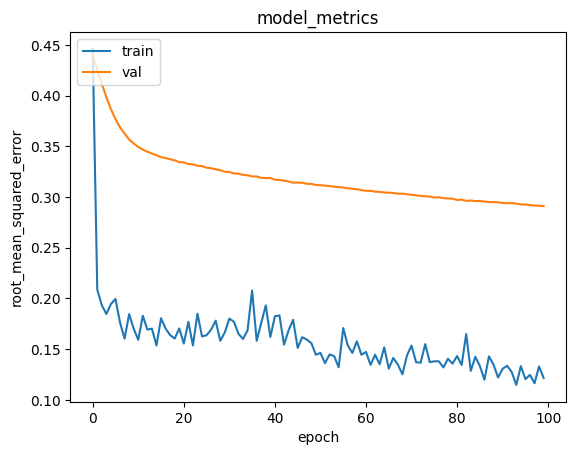

In [85]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Setelah melakukan pelatihan model, melihat plot metrik RMSE yang menunjukkan kinerja model dalam bentuk grafik. Dari plot tersebut, dapat terlihat bahwa model menghasilkan nilai RMSE sebesar 0.1149 pada train dan 0.2911 pada validation. Angka ini menunjukkan bahwa kinerja model sudah cukup baik, karena nilai RMSE yang lebih rendah menunjukkan kesalahan yang lebih kecil dalam prediksi.

In [78]:
foods_df = all_foods_df
df = pd.read_csv('content/preprocessed_dataset.csv')

# Mengambil sample nama
nama_id = df.Nama.sample(2).iloc[0]
kategori_visited_by_nama = df[df.Nama == nama_id]

kategori_not_visited = foods_df[~foods_df['nama'].isin(kategori_visited_by_nama.Kategori.values)]['nama']
kategori_not_visited = list(
    set(kategori_not_visited)
    .intersection(set(kategori_to_kategori_encoded.keys()))
)

kategori_not_visited = [[kategori_to_kategori_encoded.get(x)] for x in kategori_not_visited]
nama_encoder = nama_to_nama_encoded.get(nama_id)
nama_kategori_array = np.hstack(
    ([[nama_encoder]] * len(kategori_not_visited), kategori_not_visited)
)

Fungsi rekomendasi_makanan dirancang untuk memberikan rekomendasi menu makanan yang disesuaikan dengan tingkat risiko diabetes pasien berdasarkan skor risiko nutrisi dari masing-masing makanan. Fungsi ini menerima tiga parameter utama: probabilitas, yaitu nilai risiko diabetes pasien dalam rentang 0.00 hingga 1.00; skor_df, sebuah DataFrame yang memuat data makanan beserta kategori dan skor risiko masing-masing; serta top_n, jumlah makanan yang akan direkomendasikan pada setiap kategori risiko.

Proses rekomendasi dimulai dengan memisahkan makanan ke dalam dua kelompok berdasarkan perbandingan skor risiko makanan dengan nilai probabilitas risiko pasien. Makanan dengan skor risiko yang lebih rendah dari probabilitas pasien dianggap sebagai makanan aman dan direkomendasikan untuk dikonsumsi, sementara makanan dengan skor risiko lebih tinggi dikategorikan sebagai makanan yang sebaiknya dihindari.

Untuk memberikan variasi dan memperkaya pilihan, fungsi mengambil sampel acak sejumlah top_n makanan dari masing-masing kategori risiko, dengan pengaturan random state agar hasil dapat direproduksi. Hasil rekomendasi kemudian ditampilkan dalam dua bagian: daftar makanan aman yang direkomendasikan dan daftar makanan yang berisiko untuk dihindari.

Dengan pendekatan ini, fungsi menyediakan panduan praktis yang membantu pasien dalam memilih makanan sesuai dengan tingkat risiko diabetes mereka, sekaligus memberikan informasi yang jelas mengenai makanan yang berpotensi memperburuk kondisi. Fungsi ini dapat digunakan sebagai bagian dari sistem pendukung keputusan dalam pengelolaan pola makan penderita diabetes.

In [79]:
def rekomendasi_makanan(probabilitas, skor_df, top_n=5):
    """
    Menampilkan rekomendasi makanan berdasarkan skor risiko nutrisi untuk pasien
    dengan probabilitas risiko diabetes tertentu.

    Parameters:
    - probabilitas : float (0.00–1.00)
    - skor_df : DataFrame yang memiliki kolom ['nama', 'kategori', 'skor_risiko']
    - top_n : int, jumlah makanan yang direkomendasikan untuk masing-masing kategori
    """

    print(f"\n📊 Rekomendasi Makanan untuk Pasien dengan Risiko Diabetes: {probabilitas:.2f}")
    print("=" * 60)

    # Filter makanan aman (skor_risiko < probabilitas)
    makanan_aman = skor_df[skor_df['skor_risiko'] < probabilitas]
    
    # Filter makanan berisiko (skor_risiko > probabilitas)
    makanan_berisiko = skor_df[skor_df['skor_risiko'] > probabilitas]

    # Ambil secara acak
    makanan_aman_sample = makanan_aman.sample(n=min(top_n, len(makanan_aman)), random_state=42)
    makanan_berisiko_sample = makanan_berisiko.sample(n=min(top_n, len(makanan_berisiko)), random_state=42)

    print("\n🟢 Rekomendasi Makanan Aman:")
    if not makanan_aman_sample.empty:
        for row in makanan_aman_sample.itertuples():
            print(f"• {row.nama} ({row.kategori}) - skor risiko: {row.skor_risiko:.2f}")
    else:
        print("Tidak ada makanan dengan skor risiko yang lebih rendah dari probabilitas.")

    print("\n🔴 Makanan yang Sebaiknya Dihindari:")
    if not makanan_berisiko_sample.empty:
        for row in makanan_berisiko_sample.itertuples():
            print(f"• {row.nama} ({row.kategori}) - skor risiko: {row.skor_risiko:.2f}")
    else:
        print("Tidak ada makanan yang lebih berisiko dari probabilitas.")


Pada contoh ini, fungsi rekomendasi_makanan dipanggil dengan nilai probabilitas_pasien sebesar 0.35. Artinya, pasien tersebut memiliki risiko diabetes sekitar 35%. Fungsi akan memproses DataFrame skor_df yang memuat daftar makanan beserta kategori dan skor risiko masing-masing, kemudian memilih makanan yang memiliki skor risiko di bawah 0.35 sebagai makanan yang aman dan layak direkomendasikan untuk dikonsumsi pasien. Sebaliknya, makanan dengan skor risiko di atas 0.35 dianggap berisiko dan disarankan untuk dihindari.

Fungsi akan menampilkan masing-masing hingga 5 makanan acak dari kelompok makanan aman dan berisiko sebagai rekomendasi praktis bagi pasien. Output ini dapat digunakan sebagai panduan dalam memilih menu makanan sehari-hari yang sesuai dengan tingkat risiko diabetes pasien tersebut, sehingga membantu dalam pengelolaan pola makan dan kesehatan secara lebih efektif.

In [80]:
# Misal nilai probabilitas risiko diabetes pasien = 0.35
probabilitas_pasien = 0.35

# Panggil fungsi rekomendasi
rekomendasi_makanan(probabilitas=probabilitas_pasien, skor_df=skor_df, top_n=5)




📊 Rekomendasi Makanan untuk Pasien dengan Risiko Diabetes: 0.35

🟢 Rekomendasi Makanan Aman:
• Bawang Putih Cincang (Sayur) - skor risiko: 0.01
• Paha Ayam Panggang (Daging) - skor risiko: 0.32
• Kalkun (Daging) - skor risiko: 0.14
• Kelapa (Buah) - skor risiko: 0.20
• Sosis Kalkun (Daging) - skor risiko: 0.02

🔴 Makanan yang Sebaiknya Dihindari:
• Nasi Putih Instan (Karbohidrat) - skor risiko: 0.37
• Kentang Panggang Diisi dengan Keju (Kulit Dimakan) (Sayur) - skor risiko: 0.50
• Sup Tomat (Kalengan, Terkondensasi) (Sup) - skor risiko: 0.71
• Keripik Kentang (Asin) (Camilan) - skor risiko: 0.50
• Kaldu Jamur (Sup) - skor risiko: 0.57


## Kesimpulan

Fungsi rekomendasi_makanan berhasil memberikan rekomendasi menu makanan yang disesuaikan dengan tingkat probabilitas risiko diabetes pasien. Berdasarkan skor risiko nutrisi yang dihitung untuk setiap makanan, fungsi ini memisahkan makanan menjadi dua kategori utama, yaitu makanan yang aman dikonsumsi (dengan skor risiko lebih rendah dari probabilitas pasien) dan makanan yang sebaiknya dihindari (dengan skor risiko lebih tinggi dari probabilitas pasien).

Rekomendasi makanan aman membantu pasien memilih menu yang lebih rendah potensi risikonya terhadap peningkatan diabetes, sementara daftar makanan yang sebaiknya dihindari memberikan informasi tentang pilihan yang perlu diminimalkan atau dieliminasi dari pola makan.

Metode pengambilan sampel acak dari masing-masing kategori menjaga keberagaman pilihan makanan dalam rekomendasi sehingga pasien dapat memiliki opsi yang bervariasi. Dengan demikian, fungsi ini menjadi alat bantu yang efektif dalam mendukung keputusan diet bagi penderita diabetes mellitus, dengan mempertimbangkan profil risiko nutrisi secara personal.